In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be sav-ed outside of the current session

/kaggle/input/spamemail2/emails.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc

In [7]:
import pandas as pd
email_data = pd.read_csv('/kaggle/input/spamemail2/emails.csv')

In [8]:
email_data.shape

(5172, 3002)

In [9]:
print(email_data.shape)
print(email_data.index)
print(email_data.columns)
print(len(email_data.columns))

(5172, 3002)
RangeIndex(start=0, stop=5172, step=1)
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)
3002


In [10]:
print("Shape:", email_data.shape)
print("Index:", email_data.index)
print("All column names:", email_data.columns.tolist())
print("Total number of columns:", len(email_data.columns))

Shape: (5172, 3002)
Index: RangeIndex(start=0, stop=5172, step=1)
All column names: ['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara', 'about', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'now', 'their', 'file', 'some', 'email', 'jus

In [11]:
email_data.head(n=5)
#print(email_data.head())

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [12]:
email_data.tail(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import pandas as pd
df = pd.read_csv("/kaggle/input/spamemail2/emails.csv")

In [14]:
import pandas as pd

# ✅ Step 1: Load dataset correctly from Kaggle path
df = pd.read_csv('/kaggle/input/spamemail2/emails.csv')

print("Original shape:", df.shape)

# ✅ Step 2: Create df_reduced
df_reduced = df.copy()

# ✅ Step 3: Keep only numeric columns
df_reduced = df_reduced.select_dtypes(include='number')

print("After removing non-numeric columns:", df_reduced.shape)

# ✅ Step 4: Correlation matrix
corr_matrix = df_reduced.corr().abs()

# ✅ Step 5: Identify highly correlated columns (threshold = 0.9)
import numpy as np
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]

print("Dropped columns due to high correlation:", to_drop)

# ✅ Step 6: Drop columns
df_reduced = df_reduced.drop(columns=to_drop)

print("Columns after dropping:", df_reduced.shape)



Original shape: (5172, 3002)
After removing non-numeric columns: (5172, 3001)
Dropped columns due to high correlation: ['hou', 'i', 'at', 's', 'it', 'or', 're', 'e', 'd', 'an', 't', 'l', 'm', 'th', 'net', 'p', 'o', 'c', 'he', 'r', 'h', 'u', 'his', 'size', 'width', 'n', 'aol', 'g', 'graves', 'securities', 'v', 'nd', 'hanks', 'meyers', 'young', 'gcs', 'cec', 'weissman', 'st', 'mark', 'border', 'href', 'aimee', 'src', 'y', 'rita', 'hotmail', 'style', 'meet', 'sherlyn', 'enter', 'question', 'flash', 'agree', 'thank', 'lsp', 'option', 'reinhardt', 'duty', 'luong', 'easttexas', 'statement', 'valign', 'employee', 'albrecht', 'expectations', 'eileen', 'hotlist', 'balance', 'images', 'format', 'boas', 'certain', 'allocate', 'colspan', 'al', 'gomes', 'knle', 'national', 'html', 'result', 'sources', 'communication', 'uncertainties', 'hour', 'voice', 'projections', 'img', 'goliad', 'htmlimg', 'located', 'apr', 'met', 'dth', 'normal', 'prod', 'td', 'kristen', 'inform', 'live', 'msn', 'ooking', 'haw

In [15]:
print("Original:", df.shape)

Original: (5172, 3002)


In [16]:
print("After doc freq filter:", df_reduced.shape)

After doc freq filter: (5172, 2789)


In [17]:
features_before_corr = set(df_reduced.columns)

# Correlation drop code again
corr_matrix = df_reduced.drop(columns=["Prediction"]).corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df_reduced.drop(columns=to_drop, inplace=True)

features_after_corr = set(df_reduced.columns)

print("Dropped by correlation:", features_before_corr - features_after_corr)
print("After correlation drop:", df_reduced.shape)

Dropped by correlation: set()
After correlation drop: (5172, 2789)


In [18]:
from sklearn.feature_selection import VarianceThreshold

# Drop target column
X = df.drop(columns=["Prediction"])

# Keep only numeric columns
X_numeric = X.select_dtypes(include=['number'])

# Apply variance threshold
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X_numeric)

# Get names of selected columns
selected_cols = X_numeric.columns[selector.get_support()]

# Show results
print("Dropped by low variance:", set(X_numeric.columns) - set(selected_cols))
print("After low variance drop:", X_reduced.shape[1])


Dropped by low variance: {'strictly', 'variety', 'millions', 'difficult', 'reasons', 'choice', 'forwarding', 'community', 'aeor', 'returns', 'twenty', 'releases', 'ahead', 'formula', 'finding', 'makes', 'graphics', 'solicitation', 'often', 'dry', 'biggest', 'hundreds', 'alland', 'saying', 'keeping', 'proven', 'fear', 'larger', 'adjusted', 'offered', 'imceanotes', 'prompt', 'disclosure', 'initially', 'caused', 'darrel', 'thoughts', 'matters', 'atleast', 'experiencing', 'achieve', 'messaging', 'contacting', 'pooling', 'reform', 'indicating', 'pertaining', 'understands', 'producers', 'randall', 'sutton', 'starts', 'eliminate', 'determined', 'otherwise', 'generated', 'explosion', 'almost', 'happening', 'appreciated', 'loading', 'offsystem', 'reid', 'invoiced', 'amazing', 'continuing', 'straight', 'deciding', 'reached', 'ordered', 'websites', 'examples', 'anticipates', 'doubt', 'predictions', 'helpful', 'heavy', 'hence', 'anytime', 'thousands', 'gathered', 'accountant', 'zonedubai', 'contin

In [19]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Assume df_reduced already defined and includes "Prediction"
X = df_reduced.drop(columns=["Prediction"])
y = df_reduced["Prediction"]

# Apply variance threshold
selector = VarianceThreshold(threshold=0.05)
X_reduced = selector.fit_transform(X)

# Get the columns that were **kept**
kept_columns = X.columns[selector.get_support()]
# Get the columns that were **dropped**
dropped_columns = X.columns[~selector.get_support()]

# Create reduced DataFrame
df_reduced = pd.DataFrame(X_reduced, columns=kept_columns)
df_reduced["Prediction"] = y.values

# Print result
print("Dropped by low variance:", list(dropped_columns))
print("After low variance drop:", df_reduced.shape[1])


Dropped by low variance: ['anything', 'getting', 'either', 'might', 'already', 'suite', 'changed', 'few', 'better', 'morning', 'tomorrow', 'follows', 'little', 'something', 'around', 'problems', 'always', 'unsubscribe', 'never', 'rodriguez', 'acton', 'hope', 'wanted', 'yet', 'charlie', 'lsk', 'wish', 'hplnl', 'everyone', 'requested', 'shows', 'small', 'intended', 'else', 'having', 'beginning', 'estimates', 'things', 'terms', 'necessary', 'reason', 'third', 'listed', 'thomas', 'added', 'weeks', 'several', 'easy', 'cannot', 'extended', 'times', 'monthly', 'mailto', 'probably', 'neal', 'second', 'doing', 'important', 'basis', 'interested', 'requirements', 'together', 'dfarmer', 'everything', 'afternoon', 'enserch', 'coming', 'response', 'shipping', 'country', 'expected', 'really', 'nominated', 'latest', 'potential', 'priced', 'redeliveries', 'remember', 'baumbach', 'private', 'longer', 'aware', 'included', 'drugs', 'hesse', 'related', 'asked', 'kind', 'completed', 'plans', 'registered', '

In [20]:
print("After drop feature:", df_reduced.shape)

After drop feature: (5172, 1279)


In [21]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [22]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 1279 entries, the to Prediction
dtypes: int64(1279)
memory usage: 50.5 MB


In [23]:
email_data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [24]:
print(email_data['forwarded'].describe())

count    5172.000000
mean        0.250773
std         0.692774
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: forwarded, dtype: float64


In [25]:
print(email_data['spam'].describe())

count    5172.000000
mean        0.017788
std         0.187794
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: spam, dtype: float64


In [26]:
#print(email_data['forwarded'].to_string())

In [27]:
s=email_data['forwarded'].sort_values(ascending=True)
print(s)
#print(s.to_string())
#email_data['forwarded']

0        0
3366     0
3365     0
3364     0
3363     0
        ..
1160     8
1605    10
1790    10
678     11
1791    11
Name: forwarded, Length: 5172, dtype: int64


In [28]:
email_data.isnull()
#(email_data.isnull()).to_string()
#print((email_data.isnull()).to_string())

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
print(email_data['spam'])
#print(email_data['spam'].to_string())

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    0
5170    0
5171    0
Name: spam, Length: 5172, dtype: int64


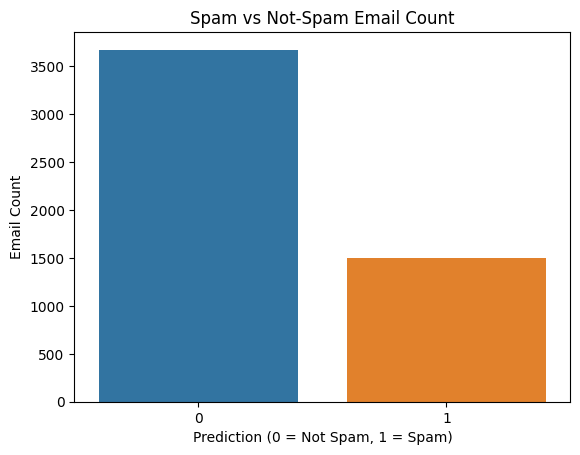

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Prediction", data=df_reduced)
plt.title("Spam vs Not-Spam Email Count")
plt.xlabel("Prediction (0 = Not Spam, 1 = Spam)")
plt.ylabel("Email Count")
plt.show()

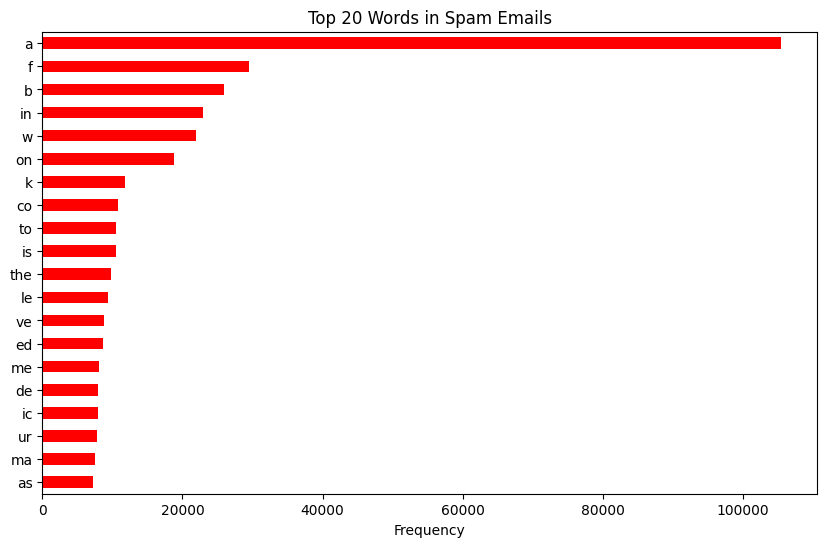

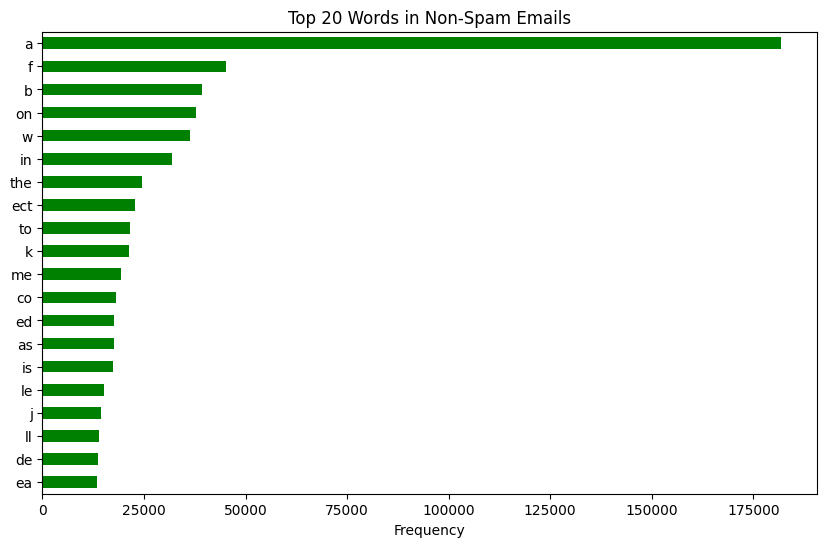

In [31]:
# Separate data
spam = df_reduced[df_reduced['Prediction'] == 1]
not_spam = df_reduced[df_reduced['Prediction'] == 0]

# Sum word frequencies
top_spam_words = spam.drop(columns='Prediction').sum().sort_values(ascending=False)[:20]
top_notspam_words = not_spam.drop(columns='Prediction').sum().sort_values(ascending=False)[:20]

# Plot spam
top_spam_words.plot(kind='barh', figsize=(10, 6), color='red')
plt.title("Top 20 Words in Spam Emails")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

# Plot not spam
top_notspam_words.plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Top 20 Words in Non-Spam Emails")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

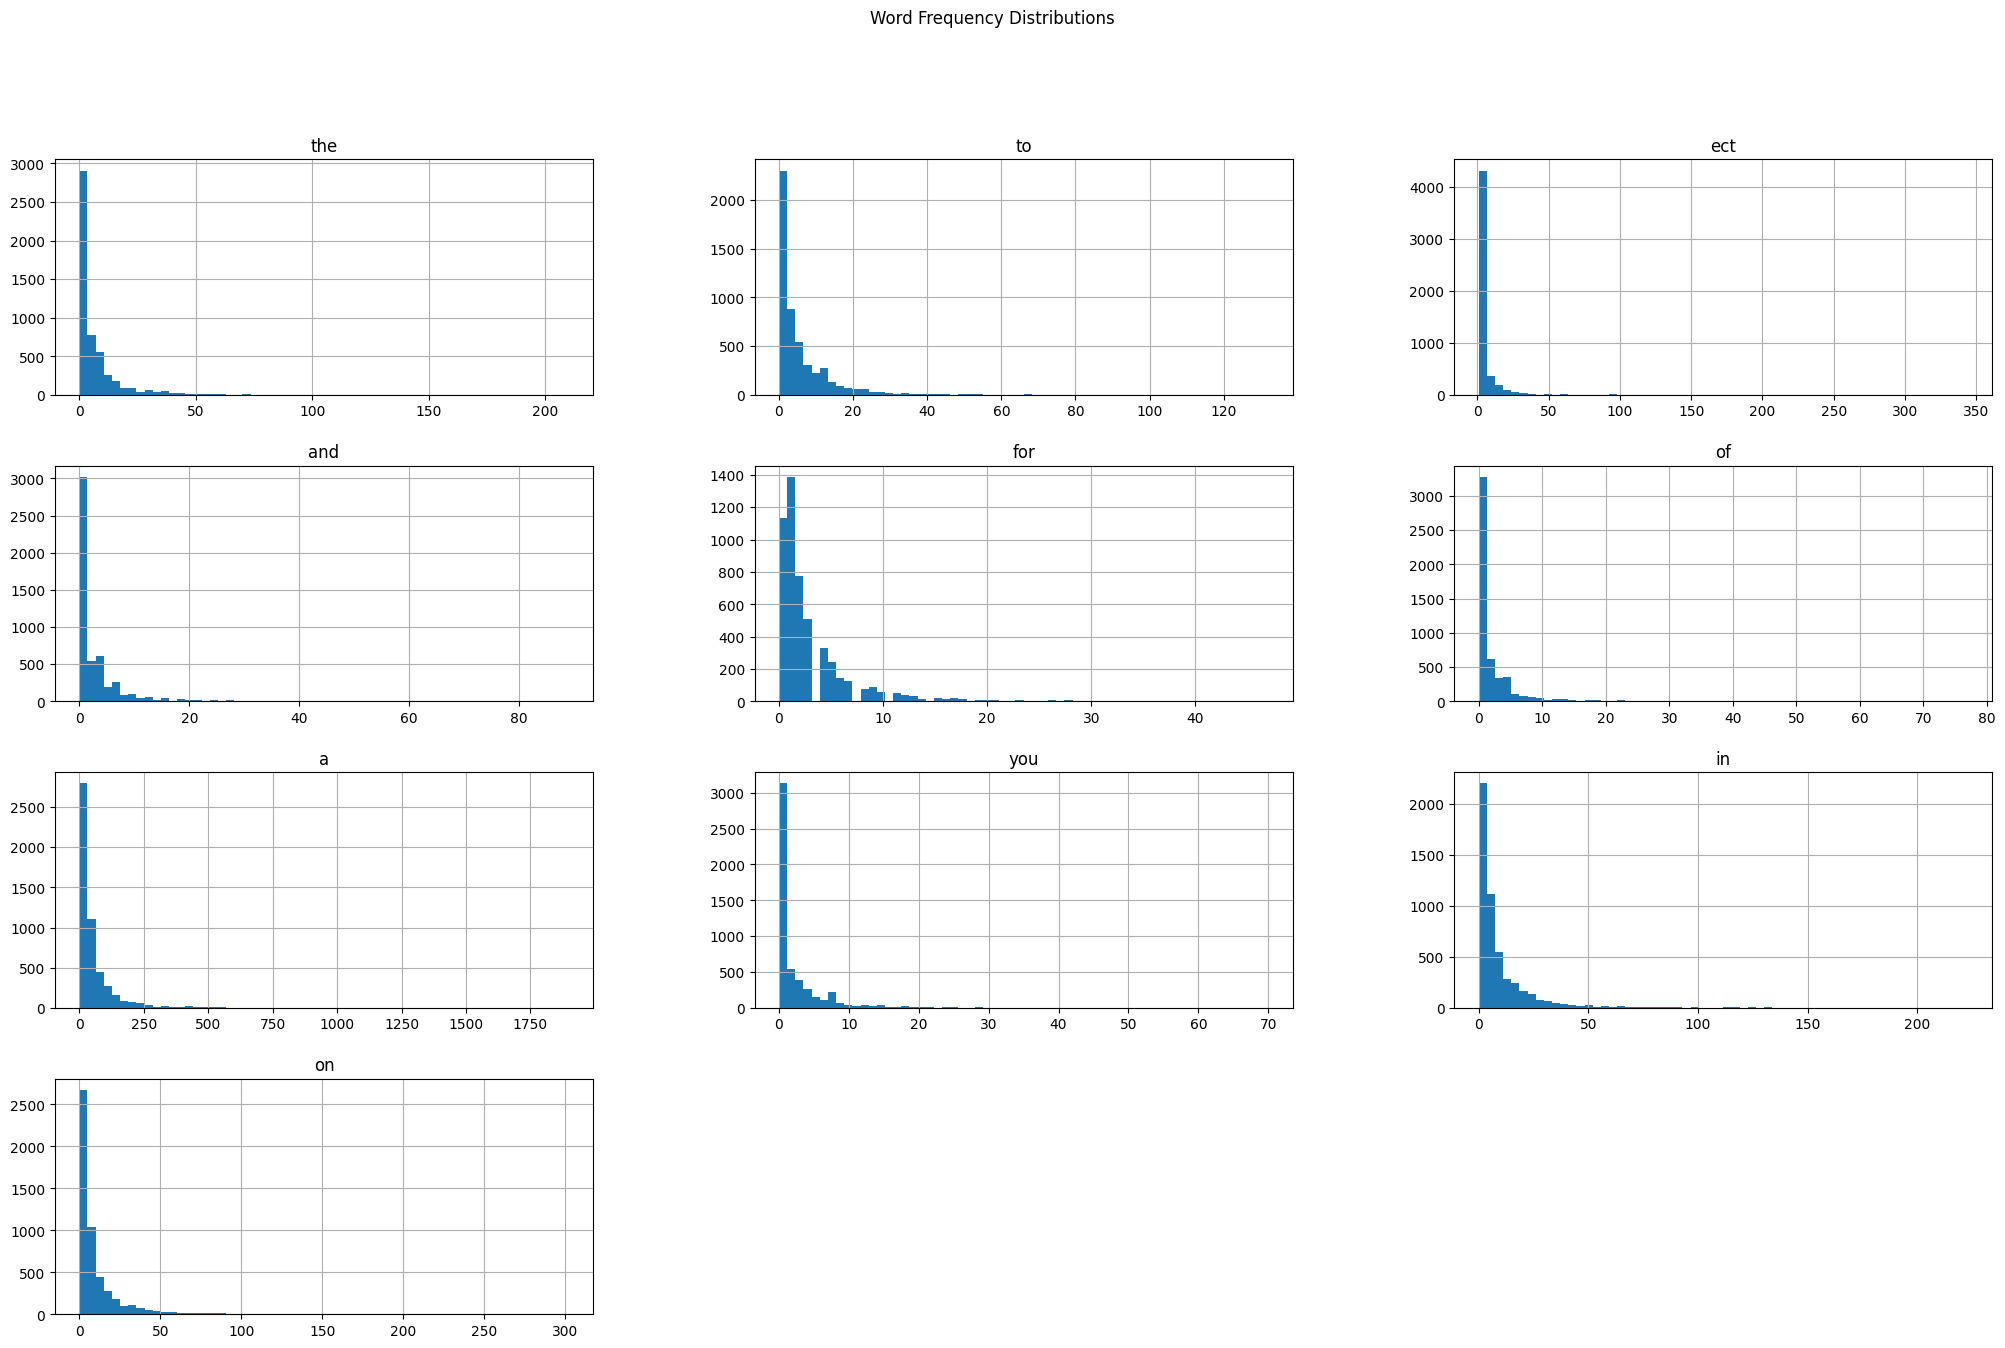

In [32]:
import numpy as np

# Choose some common words
sample_words = df_reduced.drop(columns='Prediction').columns[:10]  # First 10 words

df_reduced[sample_words].hist(figsize=(25, 15),bins=60)
plt.suptitle("Word Frequency Distributions")
plt.show()

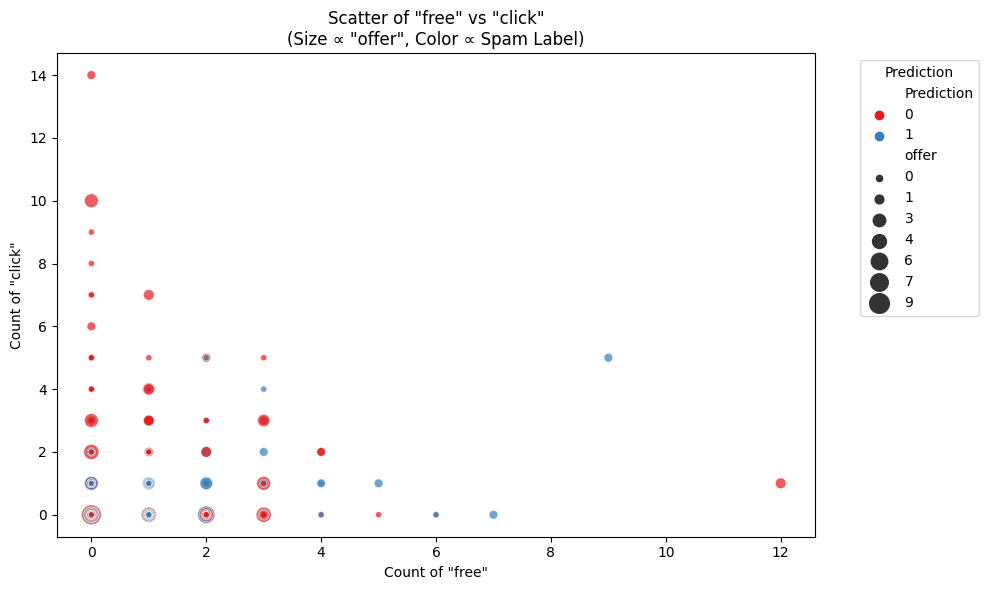

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose three word‐count features you want to visualize.
# These must exist in email_data.columns.
feature_x = "free"    # x-axis
feature_y = "click"   # y-axis
size_feature = "offer"  # point size
hue_label = "Prediction"  # spam label

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=email_data,
    x=feature_x,
    y=feature_y,
    hue=hue_label,
    size=size_feature,
    palette="Set1",
    sizes=(20, 200),
    alpha=0.7,
    edgecolor="w",
    linewidth=0.5
)
plt.title(f'Scatter of "{feature_x}" vs "{feature_y}"\n(Size ∝ "{size_feature}", Color ∝ Spam Label)')
plt.xlabel(f'Count of "{feature_x}"')
plt.ylabel(f'Count of "{feature_y}"')
plt.legend(title=hue_label, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


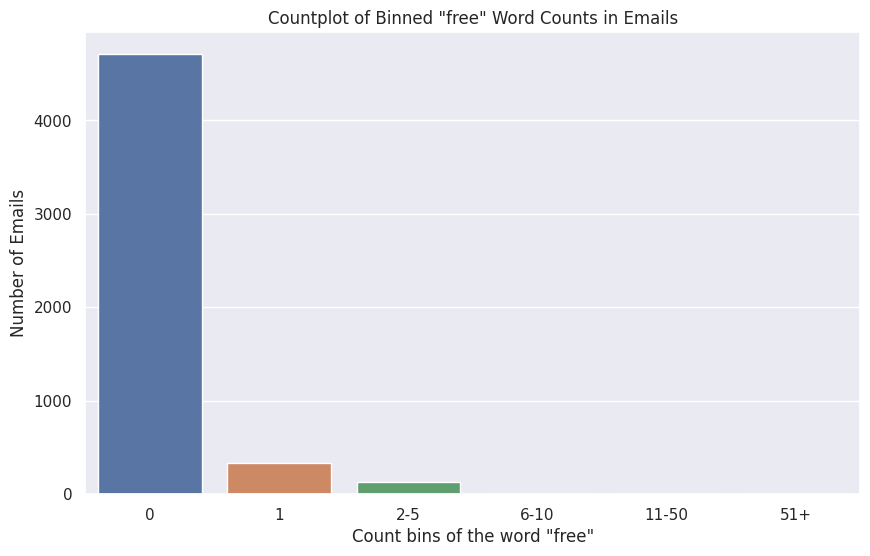

In [34]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

email_data['free_bins'] = pd.cut(email_data['free'], bins=[-1,0,1,5,10,50,100], labels=['0','1','2-5','6-10','11-50','51+'])

sns.countplot(x='free_bins', data=email_data, order=['0','1','2-5','6-10','11-50','51+'])

plt.xlabel('Count bins of the word "free"')
plt.ylabel('Number of Emails')
plt.title('Countplot of Binned "free" Word Counts in Emails')

plt.show()

Text(0.5, 1.0, 'Box Plot of "free" Word Count by Email Type')

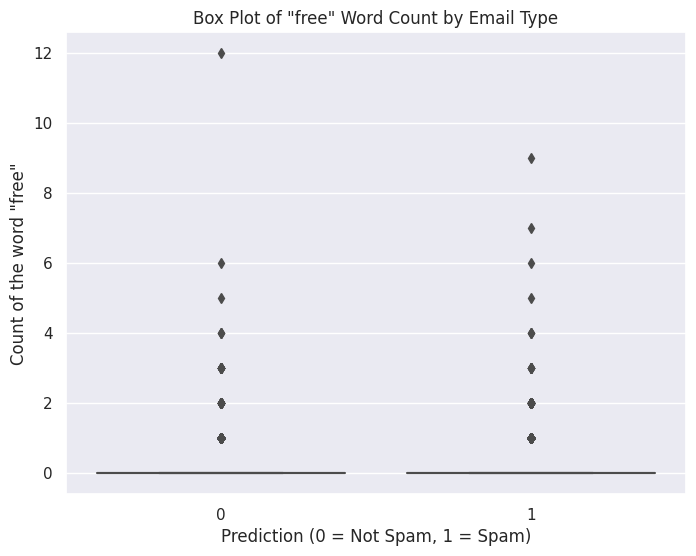

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Prediction', y='free', data=email_data)

plt.xlabel('Prediction (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count of the word "free"')
plt.title('Box Plot of "free" Word Count by Email Type')


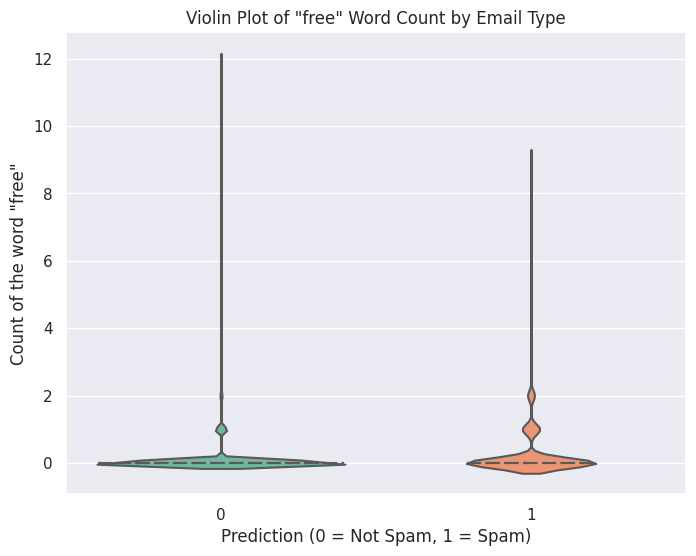

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.violinplot(x='Prediction', y='free', data=email_data, inner='quartile', palette='Set2')

plt.xlabel('Prediction (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count of the word "free"')
plt.title('Violin Plot of "free" Word Count by Email Type')

plt.show()

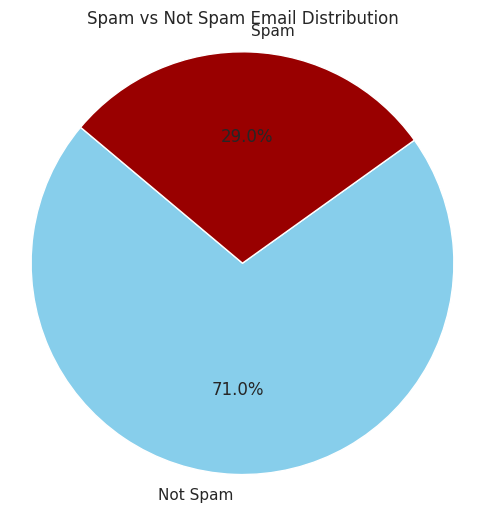

In [37]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails
counts = email_data['Prediction'].value_counts()

# Labels for the pie chart
labels = ['Not Spam', 'Spam']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#87CEEB','#990000'])
plt.title('Spam vs Not Spam Email Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [38]:
print(email_data.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'jay', 'valued', 'lay', 'infrastructure', 'military', 'allowing', 'ff',
       'dry', 'Prediction', 'free_bins'],
      dtype='object', length=3003)


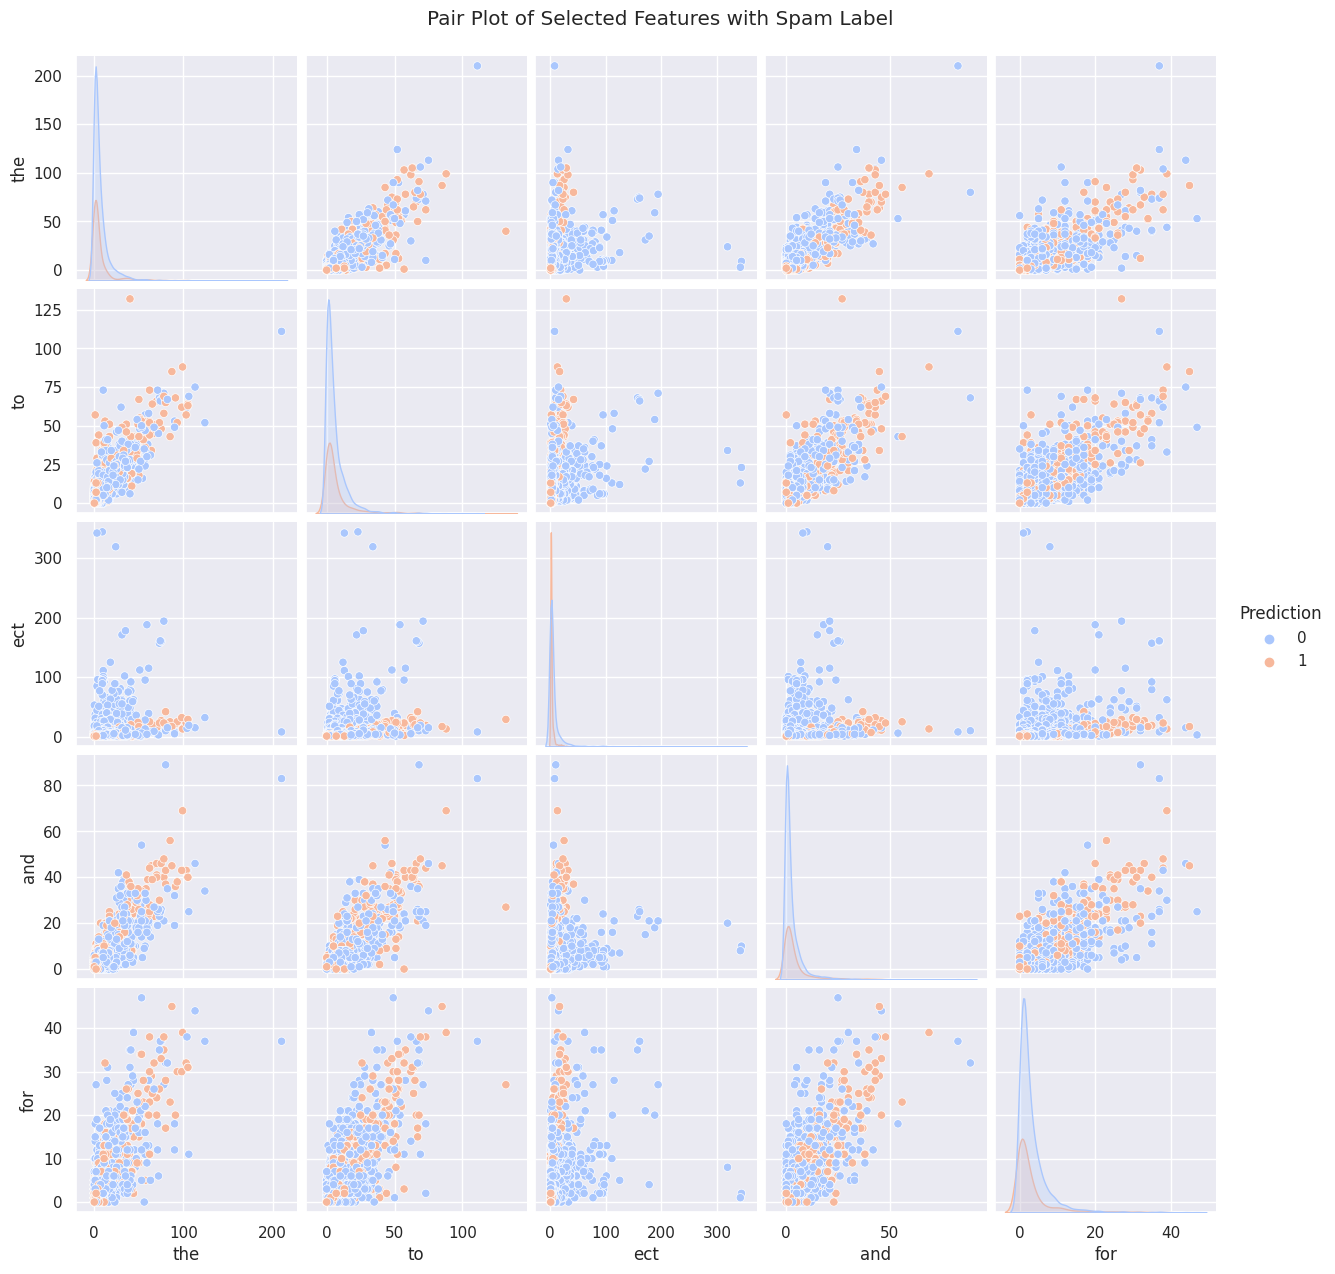

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify numeric feature columns (excluding Prediction)
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Step 2: Remove Prediction from features (if it's included)
feature_cols = [col for col in numeric_cols if col != 'Prediction']

# Step 3: Pick 5 features to plot
cols_for_plot = feature_cols[:5]  


# Step 4: Add 'Prediction' column
plot_columns = cols_for_plot + ['Prediction']

# Step 5: Pair plot
sns.pairplot(df[plot_columns], hue='Prediction', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features with Spam Label', y=1.02)
plt.show()


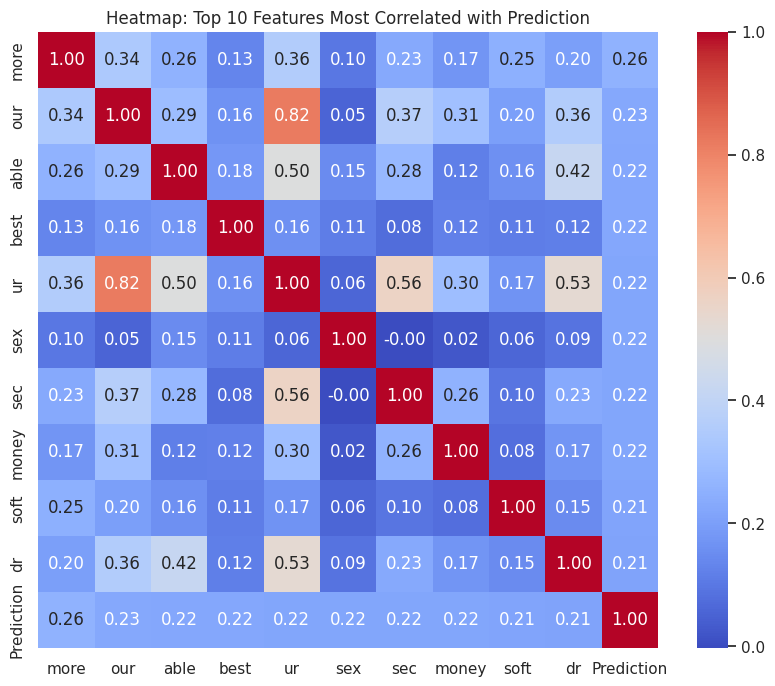

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_reduced.corr()

# Get correlations with Prediction
prediction_corr = correlation_matrix["Prediction"].drop("Prediction").sort_values(ascending=False)

# Select top 10 features most correlated with Prediction
top_features = prediction_corr.head(10).index.tolist()

# Create a mini correlation matrix with just top features + Prediction
top_corr_matrix = df_reduced[top_features + ["Prediction"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Top 10 Features Most Correlated with Prediction")
plt.show()

In [41]:
print(email_data.columns)

categorical_cols = email_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    email_data[col] = le.fit_transform(email_data[col])

print(email_data.head())

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'jay', 'valued', 'lay', 'infrastructure', 'military', 'allowing', 'ff',
       'dry', 'Prediction', 'free_bins'],
      dtype='object', length=3003)
Categorical columns: ['Email No.']
   Email No.  the  to  ect  and  for  of    a  you  hou  ...  jay  valued  \
0          0    0   0    1    0    0   0    2    0    0  ...    0       0   
1       1111    8  13   24    6    6   2  102    1   27  ...    0       0   
2       2222    0   0    1    0    0   0    8    0    0  ...    0       0   
3       3333    0   5   22    0    5   1   51    2   10  ...    0       0   
4       4444    7   6   17    1    5   2   57    0    9  ...    0       0   

   lay  infrastructure  military  allowing  ff  dry  Prediction  free_bins  
0    0               0         0         0   0    0           0          0  
1    0               0         0         0   1    0           0          0  
2    0               0   

In [42]:
#print(email_data.columns.tolist())

In [43]:
email_data = email_data.drop(columns=['Email No.'], errors='ignore')

In [44]:
print(email_data.columns)  # Check current columns
email_data = email_data.drop(columns=['Email No.'], errors='ignore')  # Drop if exists, else ignore

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'jay', 'valued', 'lay', 'infrastructure', 'military', 'allowing', 'ff',
       'dry', 'Prediction', 'free_bins'],
      dtype='object', length=3002)


In [45]:
X = email_data.drop(columns=['Prediction'])  # features
y = email_data['Prediction']  # target label (spam or not)

In [46]:
from sklearn.preprocessing import LabelEncoder

# Drop 'Email No.' only if it exists
if 'Email No.' in email_data.columns:
    email_data = email_data.drop(columns=['Email No.'])

# Label encode 'free_bins' if it exists
if 'free_bins' in email_data.columns:
    le = LabelEncoder()
    email_data['free_bins'] = le.fit_transform(email_data['free_bins'].astype(str))

# Separate features and target
X = email_data.drop(columns=['Prediction'])
y = email_data['Prediction']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (5172, 3001)
Target shape: (5172,)


In [47]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


In [48]:
print(y.value_counts())

Prediction
0    3672
1    1500
Name: count, dtype: int64


In [49]:
selected_columns = ['free', 'money', 'offer', 'win', 'click', 'free_bins']

available_columns = [col for col in selected_columns if col in email_data.columns]

X_selected = email_data[available_columns]

In [50]:
word_list = ['free', 'money', 'offer', 'click', 'the'] 
unique_words = list(set(word_list))
cleaned_words = [w.lower() for w in unique_words if len(w) > 2 and w.isalpha()]
print(cleaned_words)

['the', 'offer', 'money', 'free', 'click']


In [51]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Drop non-numeric or target columns
X = email_data.drop(columns=['Prediction'], errors='ignore')  # শুধু features
X_numeric = X.select_dtypes(include='number')  # শুধু সংখ্যাগত ফিচারগুলো

# Step 2: Initialize scaler
scaler = StandardScaler()

# Step 3: Fit and transform numeric data
scaled_data = scaler.fit_transform(X_numeric)

# Step 4: Convert back to DataFrame
df_standardized = pd.DataFrame(scaled_data, columns=X_numeric.columns)

# Optional: Add the Prediction column back for reference
df_standardized['Prediction'] = email_data['Prediction'].values

# Step 5: Show result
print("Standardized Data (first 5 rows):\n", df_standardized.head())

Standardized Data (first 5 rows):
         the        to       ect       and       for        of         a  \
0 -0.565449 -0.649083 -0.293895 -0.508752 -0.667663 -0.421725 -0.611169   
1  0.115757  0.714508  1.337337  0.483741  0.614369 -0.100659  0.530831   
2 -0.565449 -0.649083 -0.293895 -0.508752 -0.667663 -0.421725 -0.542649   
3 -0.565449 -0.124625  1.195490 -0.508752  0.400697 -0.261192 -0.051589   
4  0.030606 -0.019733  0.840875 -0.343336  0.400697 -0.100659  0.016931   

        you       hou        in  ...       jay    valued       lay  \
0 -0.571751 -0.290556 -0.549800  ... -0.062944 -0.091138 -0.172137   
1 -0.339949  3.584743  0.383809  ... -0.062944 -0.091138 -0.172137   
2 -0.571751 -0.290556 -0.342331  ... -0.062944 -0.091138 -0.172137   
3 -0.108147  1.144740 -0.497933  ... -0.062944 -0.091138 -0.172137   
4 -0.571751  1.001210 -0.394198  ... -0.062944 -0.091138 -0.172137   

   infrastructure  military  allowing        ff       dry  free_bins  \
0       -0.044197  -0

In [52]:
import pandas as pd

# Copy of original dataframeimport pandas as pd

# Sample dataframe
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [15, 25, 35, 45, 55]
}

df = pd.DataFrame(data)

# Copy dataframe for safe processing
df_standardized_manual = df.copy()
df_normalized_manual = df.copy()

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# ✅ Manual Standardization: (value - mean) / std
df_standardized_manual[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# ✅ Manual Normalization: (value - min) / (max - min)
df_normalized_manual[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

# Display results
print("Manual Standardized Data:\n", df_standardized_manual)
print("\nManual Normalized Data:\n", df_normalized_manual)

df_standardized_manual = df.copy()
df_normalized_manual = df.copy()

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

#  Manual Standardization: (value - mean) / std
df_standardized_manual[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

#  Manual Normalization: (value - min) / (max - min)
df_normalized_manual[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

# Display results
print("Manual Standardized Data:\n", df_standardized_manual)
print("\nManual Normalized Data:\n", df_normalized_manual)


Manual Standardized Data:
    Feature1  Feature2
0 -1.264911 -1.264911
1 -0.632456 -0.632456
2  0.000000  0.000000
3  0.632456  0.632456
4  1.264911  1.264911

Manual Normalized Data:
    Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00
Manual Standardized Data:
    Feature1  Feature2
0 -1.264911 -1.264911
1 -0.632456 -0.632456
2  0.000000  0.000000
3  0.632456  0.632456
4  1.264911  1.264911

Manual Normalized Data:
    Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


In [53]:
from sklearn.model_selection import train_test_split

# Feature matrix (সব কলাম বাদে 'Prediction')
X = email_data.drop(columns=['Prediction'])

# Target vector (spam বা not spam)
y = email_data['Prediction']

# ৮০% ট্রেনিং, ২০% টেস্টিং ভাগ করা হলো
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# আউটপুট দেখাই
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training label shape:", y_train.shape)
print("Testing label shape:", y_test.shape)

Training feature shape: (4137, 3001)
Testing feature shape: (1035, 3001)
Training label shape: (4137,)
Testing label shape: (1035,)


In [54]:
selected_features = ['free', 'money', 'click', 'offer', 'you']

# যে ফিচারগুলো আসলেই আছে তা বের করো
available_features = [col for col in selected_features if col in email_data.columns]

# X এবং y তৈরি করো
X = email_data[available_features]
y = email_data['Prediction']

# ভাগ করো
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train shape: (4137, 5)
y_train shape: (4137,)


In [55]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      free  money  click  offer  you
3314     0      0      0      0    2
4391     0      0      0      0    4
4020     0      0      0      0    0
3489     0      0      0      0    0
4165     0      1      0      0    1
...    ...    ...    ...    ...  ...
4931     0      0      0      0   18
3264     0      0      0      0    2
1653     2      0      1      1    9
2607     1      0      0      0    0
2732     0      0      0      0    5

[4137 rows x 5 columns]
3314    1
4391    1
4020    0
3489    0
4165    1
       ..
4931    0
3264    1
1653    1
2607    0
2732    1
Name: Prediction, Length: 4137, dtype: int64
      free  money  click  offer  you
3324     0      0      0      0    0
15       1      0      0      0    3
4950     0      0      0      0    3
3964     0      0      0      0    1
2315     0      0      0      0    0
...    ...    ...    ...    ...  ...
2689     0      0      0      0    0
4619     0      0      1      0    0
4358     0      0      0      0   10
2566  

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
print(X_test.shape)  # দেখতে পারবে test set এ কয়টা sample আছে
print(y_pred)        # prediction এর output

(1035, 5)
[0 0 0 ... 0 0 0]


In [59]:
import re

def count_links(text):
    return len(re.findall(r'http[s]?://', text))

def count_special_chars(text):
    return sum(1 for c in text if c in "!$%#")

def count_uppercase_words(text):
    return sum(1 for word in text.split() if word.isupper())

def contains_spam_words(text, spam_words):
    return int(any(word in text.lower() for word in spam_words))

# Example
spam_words = ['free', 'win', 'offer', 'money', 'click', 'urgent']

email_text = "WIN a FREE prize! Click here: http://spam.com!!!"

print(count_links(email_text))          # 1
print(count_special_chars(email_text))  # 4
print(count_uppercase_words(email_text))# 2 (WIN, FREE)
print(contains_spam_words(email_text, spam_words))  # 1


1
4
2
1


In [60]:
import pandas as pd
import re

emails = [
    "WIN a FREE prize! Click here: http://spam.com!!!",
    "Hello friend, how are you doing?",
    "Exclusive OFFER just for you $$$",
    "Urgent! You have won $1000!!! Click to claim.",
    "Reminder: Your appointment is scheduled for tomorrow.",
    "Get cheap meds now!!! Visit http://pharmacy.com",
]

spam_words = ['free', 'win', 'offer', 'money', 'click', 'urgent']

# ফিচার গুলো বের করার ফাংশনগুলো
def count_links(text):
    return len(re.findall(r'http[s]?://\S+', text))

def count_special_chars(text):
    return len(re.findall(r'[!$%&?@]', text))

def count_uppercase_words(text):
    words = text.split()
    return sum(1 for w in words if w.isupper())

def contains_spam_words(text, spam_words):
    text_lower = text.lower()
    return int(any(word in text_lower for word in spam_words))

def extract_features(text):
    return {
        'num_links': count_links(text),
        'num_special_chars': count_special_chars(text),
        'num_uppercase_words': count_uppercase_words(text),
        'contains_spam_words': contains_spam_words(text, spam_words),
        'email_length': len(text),
        'num_words': len(text.split())
    }

# ফিচার বের করা সব ইমেইলের জন্য
features = [extract_features(email) for email in emails]

df = pd.DataFrame(features)
print(df)


   num_links  num_special_chars  num_uppercase_words  contains_spam_words  \
0          1                  4                    2                    1   
1          0                  1                    0                    0   
2          0                  3                    1                    1   
3          0                  5                    0                    1   
4          0                  0                    0                    0   
5          1                  3                    0                    0   

   email_length  num_words  
0            48          7  
1            32          6  
2            32          6  
3            45          8  
4            53          7  
5            47          6  


In [61]:
emails.append("Your new email text goes here")

In [62]:
emails.extend([
    "Congratulations! You've won a free lottery ticket. Click here to claim.",
    "Dear customer, your invoice for last month is attached.",
    "Hurry up! Limited time offer on our new product.",
    "Meeting rescheduled to 3 PM tomorrow.",
    "Get cheap loans at 0% interest. Apply now!",
    "Your subscription will expire soon, renew today.",
    "Can we catch up over coffee this weekend?"
])


In [63]:
print(emails)

['WIN a FREE prize! Click here: http://spam.com!!!', 'Hello friend, how are you doing?', 'Exclusive OFFER just for you $$$', 'Urgent! You have won $1000!!! Click to claim.', 'Reminder: Your appointment is scheduled for tomorrow.', 'Get cheap meds now!!! Visit http://pharmacy.com', 'Your new email text goes here', "Congratulations! You've won a free lottery ticket. Click here to claim.", 'Dear customer, your invoice for last month is attached.', 'Hurry up! Limited time offer on our new product.', 'Meeting rescheduled to 3 PM tomorrow.', 'Get cheap loans at 0% interest. Apply now!', 'Your subscription will expire soon, renew today.', 'Can we catch up over coffee this weekend?']


In [64]:
features = [extract_features(email) for email in emails]
df = pd.DataFrame(features)
print(df)

    num_links  num_special_chars  num_uppercase_words  contains_spam_words  \
0           1                  4                    2                    1   
1           0                  1                    0                    0   
2           0                  3                    1                    1   
3           0                  5                    0                    1   
4           0                  0                    0                    0   
5           1                  3                    0                    0   
6           0                  0                    0                    0   
7           0                  1                    0                    1   
8           0                  0                    0                    0   
9           0                  1                    0                    1   
10          0                  0                    1                    0   
11          0                  2                    0           

In [65]:
features = [extract_features(email) for email in emails]
df = pd.DataFrame(features)
print(df)

    num_links  num_special_chars  num_uppercase_words  contains_spam_words  \
0           1                  4                    2                    1   
1           0                  1                    0                    0   
2           0                  3                    1                    1   
3           0                  5                    0                    1   
4           0                  0                    0                    0   
5           1                  3                    0                    0   
6           0                  0                    0                    0   
7           0                  1                    0                    1   
8           0                  0                    0                    0   
9           0                  1                    0                    1   
10          0                  0                    1                    0   
11          0                  2                    0           

In [66]:
features = [extract_features(email) for email in emails]
df = pd.DataFrame(features)
print(df)

    num_links  num_special_chars  num_uppercase_words  contains_spam_words  \
0           1                  4                    2                    1   
1           0                  1                    0                    0   
2           0                  3                    1                    1   
3           0                  5                    0                    1   
4           0                  0                    0                    0   
5           1                  3                    0                    0   
6           0                  0                    0                    0   
7           0                  1                    0                    1   
8           0                  0                    0                    0   
9           0                  1                    0                    1   
10          0                  0                    1                    0   
11          0                  2                    0           

In [67]:
# নতুন ইমেইল যোগ করা
emails.extend([
    "Congratulations! You've won a free lottery ticket. Click here to claim.",
    "Dear customer, your invoice for last month is attached.",
    "Hurry up! Limited time offer on our new product.",
    "Meeting rescheduled to 3 PM tomorrow.",
    "Get cheap loans at 0% interest. Apply now!",
    "Your subscription will expire soon, renew today.",
    "Can we catch up over coffee this weekend?"
])

# ফিচার extraction আবার চালানো
features = [extract_features(email) for email in emails]
df = pd.DataFrame(features)
print(df)


    num_links  num_special_chars  num_uppercase_words  contains_spam_words  \
0           1                  4                    2                    1   
1           0                  1                    0                    0   
2           0                  3                    1                    1   
3           0                  5                    0                    1   
4           0                  0                    0                    0   
5           1                  3                    0                    0   
6           0                  0                    0                    0   
7           0                  1                    0                    1   
8           0                  0                    0                    0   
9           0                  1                    0                    1   
10          0                  0                    1                    0   
11          0                  2                    0           

In [68]:
spam_emails = [
    "WIN a brand new iPhone! Limited time offer!",
    "Congratulations! You've been selected for a FREE cruise.",
    "Click now to claim your cash prize!",
    "You have won $10,000! Act fast!",
    "Get RICH from home! No experience needed!",
    "Hurry! Your account has been selected for a reward.",
    "Earn money fast using this secret trick!",
    "Special OFFER only for you! Limited time.",
    "Claim your free gift card now!",
    "This is URGENT! Update your account information.",
    "Congratulations! You've won a free iPhone. Click here to claim now!",
    "Urgent! Your account has been compromised. Reset your password immediately.",
    "You have been selected for a $1000 Walmart gift card. Claim today!",
    "Earn money fast from home with this one simple trick.",
    "Limited time offer! Buy one get one free on all products.",
    "You won a lottery! Submit your details to receive the prize.",
    "Get cheap loans at 0% interest. Apply now!",
    "This is your last chance to save 50% on your subscription.",
    "FREE vacation tickets! Click to book your trip.",
    "Work from home and earn $5000 weekly.",
    "Your credit score improved! Check now.",
    "Exclusive offer just for you, don’t miss out!",
    "Make money online without any investment.",
    "You've been pre-approved for a loan. Apply now!",
    "Get rich quick with this investment opportunity.",
    "Limited seats available for the free webinar. Register now!",
    "Win big cash prizes every day. Join now!",
    "Click here to get your free trial of our product.",
    "Your package is waiting. Confirm your delivery now.",
    "Cheap prescription drugs available online. Order today.",
    "Congratulations, you’ve been chosen for a free gift card.",
    "This is not a scam! Claim your reward immediately.",
    "Earn passive income from the comfort of your home.",
    "Exclusive deal: 70% off on all electronics!",
    "You have an unpaid invoice. Click here to pay now.",
    "Act now! Your account will be suspended soon.",
    "Make thousands of dollars with this simple method.",
    "Claim your free membership to our exclusive club.",
    "Limited offer: Get a free phone with your subscription.",
    "Urgent message: Verify your account details now.",
    "Don't miss out on this once-in-a-lifetime offer.",
    "Earn cash bonuses by referring friends today.",
    "You have won a free cruise trip. Click to claim.",
    "Special discount on your next purchase. Use code NOW.",
    "Get your free credit report instantly.",
    "Make money from surveys online.",
    "Act fast! Limited stock available.",
    "You have a pending reward. Claim it now.",
    "Congratulations! You've won a free shopping spree.",
    "Get paid for watching videos at home.",
    "Limited time: Free access to premium content.",
    "Your payment was successful. Click here for details.",
    "You’ve been selected for a free consultation.",
    "Earn from affiliate marketing with zero investment.",
    "Claim your free online course today.",
    "Win a brand new car. Enter the contest now.",
    "Make money by sharing this message with friends.",
    "Free software download available here.",
    "Your subscription is about to expire. Renew now.",
    "Earn extra cash by completing simple tasks."
]

ham_emails = [
    "Hey, are we still meeting for lunch tomorrow?",
    "Your Amazon order has been shipped.",
    "Please review the attached project document.",
    "Don’t forget to submit your assignment by Monday.",
    "Let's catch up over coffee next week!",
    "Reminder: Doctor appointment at 4:30 PM.",
    "Monthly budget report is attached.",
    "Are you free for a call this evening?",
    "Team meeting rescheduled to Friday.",
    "Can you please send me the presentation slides?",
    "Hey, are we still meeting tomorrow for lunch?",
    "Please find attached the report for last quarter.",
    "Can you review the document and give feedback?",
    "Happy birthday! Wishing you a wonderful day.",
    "Let me know your availability for the meeting next week.",
    "The project deadline has been extended by two days.",
    "Thank you for your help with the presentation.",
    "Please confirm your attendance for the conference.",
    "Looking forward to our trip next month.",
    "The minutes of the meeting are attached here.",
    "I will be on leave tomorrow due to personal reasons.",
    "Can you send me the updated budget proposal?",
    "Please find below the agenda for today's call.",
    "We need to reschedule the meeting to Thursday.",
    "Thanks for your prompt response.",
    "Please review the attached invoice and let me know.",
    "Great job on the presentation yesterday!",
    "Are you available for a quick call this afternoon?",
    "Please update the team about the new process.",
    "I have shared the files on the drive.",
    "Don't forget to submit your timesheets by Friday.",
    "Can you help me with the software installation?",
    "The client approved the design, congratulations!",
    "I'll be working remotely next week.",
    "Let’s catch up over coffee this weekend.",
    "Please send me the contact details of the vendor.",
    "We need to finalize the event details soon.",
    "Thank you for attending the workshop.",
    "Please check the attached document for errors.",
    "Looking forward to your presentation on Monday.",
    "I have booked the conference room for 3 PM.",
    "The quarterly results will be discussed tomorrow.",
    "Can you send me the list of attendees?",
    "Reminder: submit your project reports by end of day.",
    "Please welcome our new team member.",
    "Let me know if you need any assistance.",
    "I’ll share the training materials shortly.",
    "The meeting has been postponed to next week.",
    "Thanks for your cooperation.",
    "Can you update me on the status of the project?",
    "Looking forward to our collaboration.",
    "Please confirm the delivery date for the shipment.",
    "The system update is scheduled for tonight.",
    "Thanks for your feedback on the proposal.",
    "Please find the presentation slides attached.",
    "I'll be out of office on Friday.",
    "Please call me when you get this message.",
    "The new software version is ready for testing.",
    "Thanks for your patience during the outage.",
    "Hi team, please find the attached report for last quarter."
]

emails = spam_emails + ham_emails
labels = [1]*len(spam_emails) + [0]*len(ham_emails)

print("Total emails:", len(emails))
print("Spam:", labels.count(1))
print("Not spam:", labels.count(0))


Total emails: 120
Spam: 60
Not spam: 60


In [69]:
import re

def count_links(text):
    return len(re.findall(r'http[s]?://\S+', text))

def count_special_chars(text):
    return len(re.findall(r'[!$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]', text))

def count_uppercase_words(text):
    return sum(1 for word in text.split() if word.isupper())

def contains_spam_words(text, spam_words):
    return int(any(word.lower() in text.lower() for word in spam_words))


In [70]:
import pandas as pd

spam_words = ['free', 'win', 'offer', 'money', 'click', 'urgent']

def extract_features(text):
    return {
        'num_links': count_links(text),
        'num_special_chars': count_special_chars(text),
        'num_uppercase_words': count_uppercase_words(text),
        'contains_spam_words': contains_spam_words(text, spam_words),
        'email_length': len(text),
        'num_words': len(text.split())
    }

features = [extract_features(email) for email in emails]
df = pd.DataFrame(features)


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))

RandomForestClassifier Accuracy: 0.8611111111111112
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.89      0.85      0.87        20

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# তোমার ইমেইল ডেটা (spam_emails + ham_emails)
emails = spam_emails + ham_emails
labels = [1]*len(spam_emails) + [0]*len(ham_emails)

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


24 24


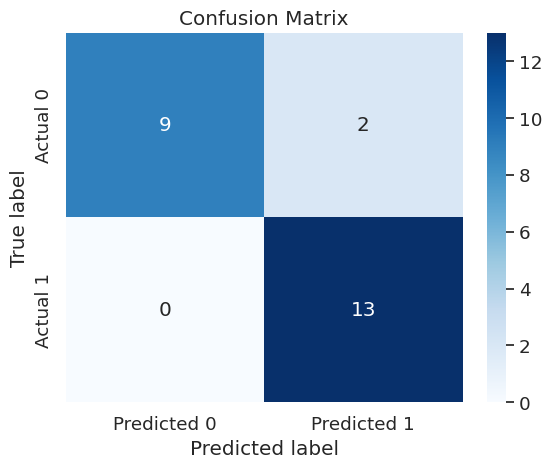

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # example model

# Suppose X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set ONLY
y_pred = model.predict(X_test)

# Now y_pred and y_test will have the same length
print(len(y_test), len(y_pred))  # both should be equal

# Then compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [74]:
cr=classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.87      0.93        15

    accuracy                           0.92        24
   macro avg       0.91      0.93      0.91        24
weighted avg       0.93      0.92      0.92        24



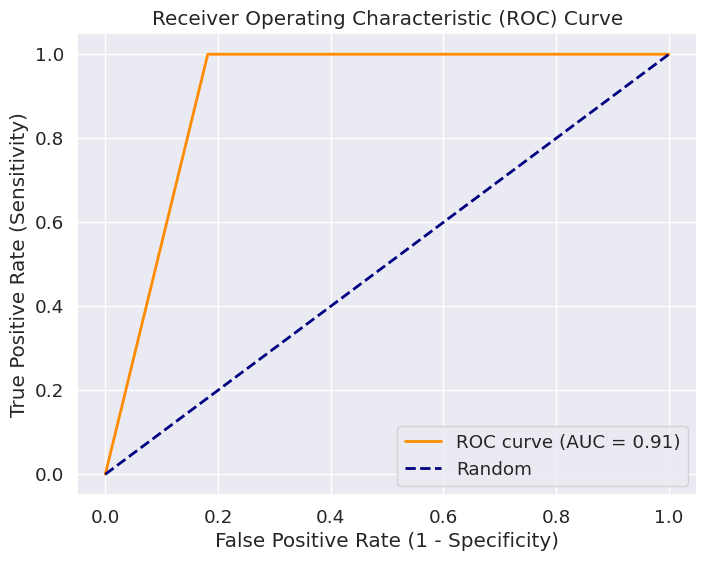

In [75]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Create a RandomForestClassifier (replace this with your classifier of choice)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create StratifiedKFold with c=10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(classifier, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the results
print("Cross-validation results:")
print(cv_results)
print(f"Mean accuracy: {cv_results.mean():.2f}")

Cross-validation results:
[1.         0.91666667 0.91666667 0.91666667 0.83333333 0.91666667
 0.91666667 0.91666667 1.         0.91666667]
Mean accuracy: 0.92


In [77]:
print(type(y))  # check type

# Convert to NumPy array if not already
if not isinstance(y, np.ndarray):
    y = np.array(y)

<class 'list'>


In [78]:
import numpy as np

# Convert y to numpy array if it isn't
if not isinstance(y, np.ndarray):
    y = np.array(y)

overall_conf_matrix = np.zeros((2, 2))

for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]  # sparse matrix supports this
    y_train, y_test = y[train_index], y[test_index]  # now indexing works

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    fold_conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    overall_conf_matrix += fold_conf_matrix

print("Overall Confusion Matrix:")
print(overall_conf_matrix)


Overall Confusion Matrix:
[[53.  7.]
 [ 2. 58.]]


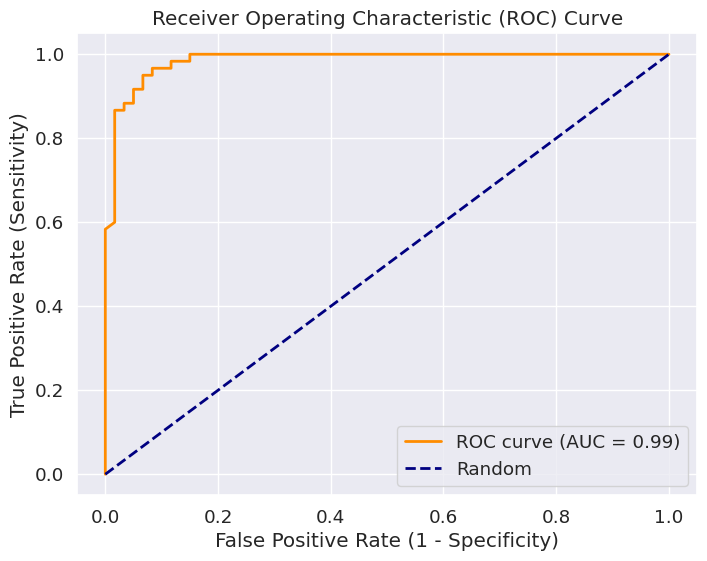

In [79]:
from sklearn.metrics import roc_curve, auc
# Initialize variables to store true labels and predicted probabilities
true_labels = []
predicted_probabilities = []
# Perform stratified cross-validation and obtain predicted probabilities
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classifier.fit(X_train, y_train)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    true_labels.extend(y_test)
    predicted_probabilities.extend(y_prob)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)


# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [80]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
knn_classifier = KNeighborsClassifier()

# Create a list of tuples, where each tuple contains a name for the classifier and the classifier instance
classifiers = [('Random Forest', rf_classifier),
               ('Logistic Regression', logistic_classifier),
               ('SVM', svm_classifier),
               ('KNN', knn_classifier)]

# Create a VotingClassifier
#VotingClassifier(estimators=classifiers, voting='hard')
voting_classifier = VotingClassifier(estimators=classifiers, voting='hard')  # You can use 'soft' for probabilities

# Now you can fit and use the voting_classifier as a regular classifier
voting_classifier.fit(X_train, y_train)
predictions = voting_classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9166666666666666


In [81]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

print(X_train_reduced)
print("Explained variance ratio:", svd.explained_variance_ratio_)

[[ 0.10979479 -0.03704022]
 [ 0.35064856 -0.16479524]
 [ 0.37959363 -0.39895671]
 [ 0.16349096 -0.09737109]
 [ 0.05957004 -0.01542061]
 [ 0.07062685 -0.00756176]
 [ 0.21067807 -0.01678254]
 [ 0.37583014 -0.39932764]
 [ 0.46513209 -0.42678389]
 [ 0.19126825 -0.12293424]
 [ 0.29793225 -0.164014  ]
 [ 0.11876229 -0.00412422]
 [ 0.15243731 -0.1009646 ]
 [ 0.35494799 -0.11162069]
 [ 0.08687795 -0.08569483]
 [ 0.29961933 -0.10723274]
 [ 0.27846378 -0.28868867]
 [ 0.05180271  0.03620909]
 [ 0.14994768 -0.13899471]
 [ 0.19310521 -0.00827418]
 [ 0.04502189 -0.01533592]
 [ 0.11544452 -0.01031169]
 [ 0.0734684  -0.08071391]
 [ 0.36085642 -0.2738768 ]
 [ 0.24164866 -0.12724588]
 [ 0.06038686 -0.03806269]
 [ 0.34572718 -0.18823328]
 [ 0.2137613  -0.15632141]
 [ 0.2041681   0.06872345]
 [ 0.2829449  -0.20532968]
 [ 0.16830826 -0.12461404]
 [ 0.1070821   0.02540718]
 [ 0.30917508 -0.30928229]
 [ 0.27442649 -0.18697201]
 [ 0.18929782 -0.14571858]
 [ 0.11293239 -0.01369731]
 [ 0.08014893 -0.04465107]
 

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Accuracy: 1.0
[[6 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [83]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  # You can try 'rbf' too
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 1.0
[[6 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed

# Step 2: Fit the model to the training data
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the model
print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred_knn))


🔹 KNN Accuracy: 0.9166666666666666
🔹 Confusion Matrix:
 [[5 1]
 [0 6]]
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [85]:
# Example metrics — replace with your actual values
data = {
    'Model': ['SVM', 'KNN', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [1.0, 0.916, 1.0, 0.86112],
    'Precision': [1.0, 0.86, 1.0, 0.89],
    'Recall': [1.0, 1.0, 1.0, 0.85],
    'F1-Score': [1.0,0.92, 1.0, 0.87]
}

df = pd.DataFrame(data)
print(df)

                 Model  Accuracy  Precision  Recall  F1-Score
0                  SVM   1.00000       1.00    1.00      1.00
1                  KNN   0.91600       0.86    1.00      0.92
2  Logistic Regression   1.00000       1.00    1.00      1.00
3        Random Forest   0.86112       0.89    0.85      0.87


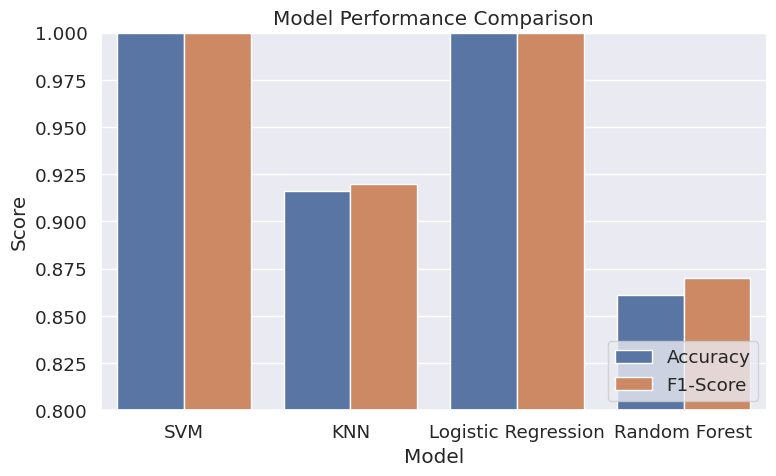

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example data
models = ['SVM', 'KNN', 'Logistic Regression', 'Random Forest']
accuracy = [1.0, 0.916, 1.0, 0.86112]
f1_score = [1.0, 0.92, 1.0, 0.87]
# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'F1-Score': f1_score
})

# Melt the dataframe for seaborn
df_melted = df_plot.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.ylim(0.80, 1.00)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
